# ***Demonstration for OA_week***

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/semanticClimate/encyclopedia/blob/main/Demonstration_for_OA_week_NYIT.ipynb)

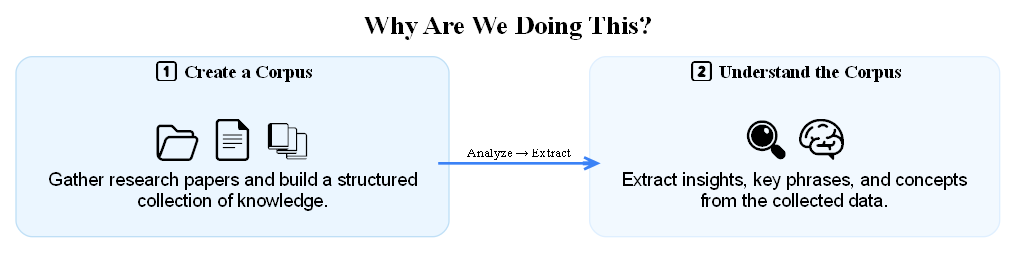

## **Step 1: Create the corpus!**




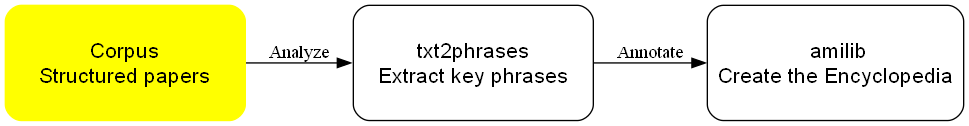

## **Corpus Creation using pygetpapers**

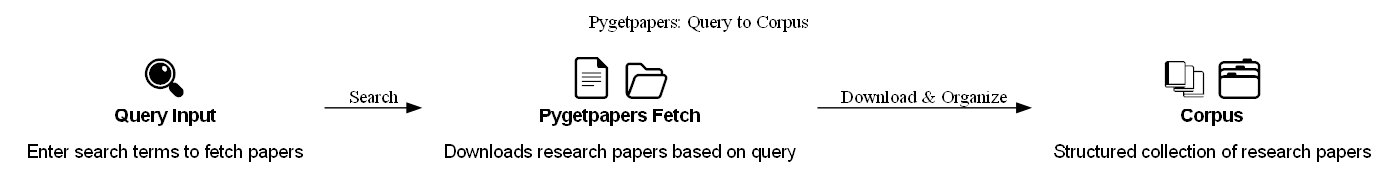

### **Step 1.1 Install pygetpapers**

In [ ]:
!rm -rf pygetpapers
!git clone --branch v20 https://github.com/petermr/pygetpapers.git > /dev/null 2>&1

In [ ]:
%cd /content/pygetpapers

# Step 3: Install the package
!pip install -e . > /dev/null 2>&1

### **Step 1.2: Installation of all the required libraries for `pygetpapers`**

**NOTE**: **Do not click** on the **RESTART SESSION** option on the pop-up window. **Click on cancel**.

**REASON**: Clicking on Cancel option will install the requirements of `pygetpapers` only otherwise it will take the default setting of the colab environment (like the different latest version of the library which are not required by `pygetpapers`.)

In [ ]:
!pip install -r requirements.txt  > /dev/null 2>&1

### **See All Pygetpapers Commands with --help**

In [ ]:
!pygetpapers --help

## **Step 1.3: Searching and downloading scientific literatures on the query term.**

- -q = query (for example: Carbon Capture, it can be changed to any keyword)
- -k = number of papers (Here it is 10, this can be any number)
- -o = output file name (Here it is Carbon_Capture, this can be any name)
- -x = paper in XML format
- -p = paper in pdf format
- --fulltext_html = paper in HTML format
- --datatables = create datatables

**See more options from GitHub repository : [pygetpapers](https://github.com/petermr/pygetpapers)**

In [ ]:
!pygetpapers -q "Carbon Capture" -k 10 -o Carbon_Capture -x -p --fulltext_html --datatables > /dev/null 2>&1

## **Corpus is created**

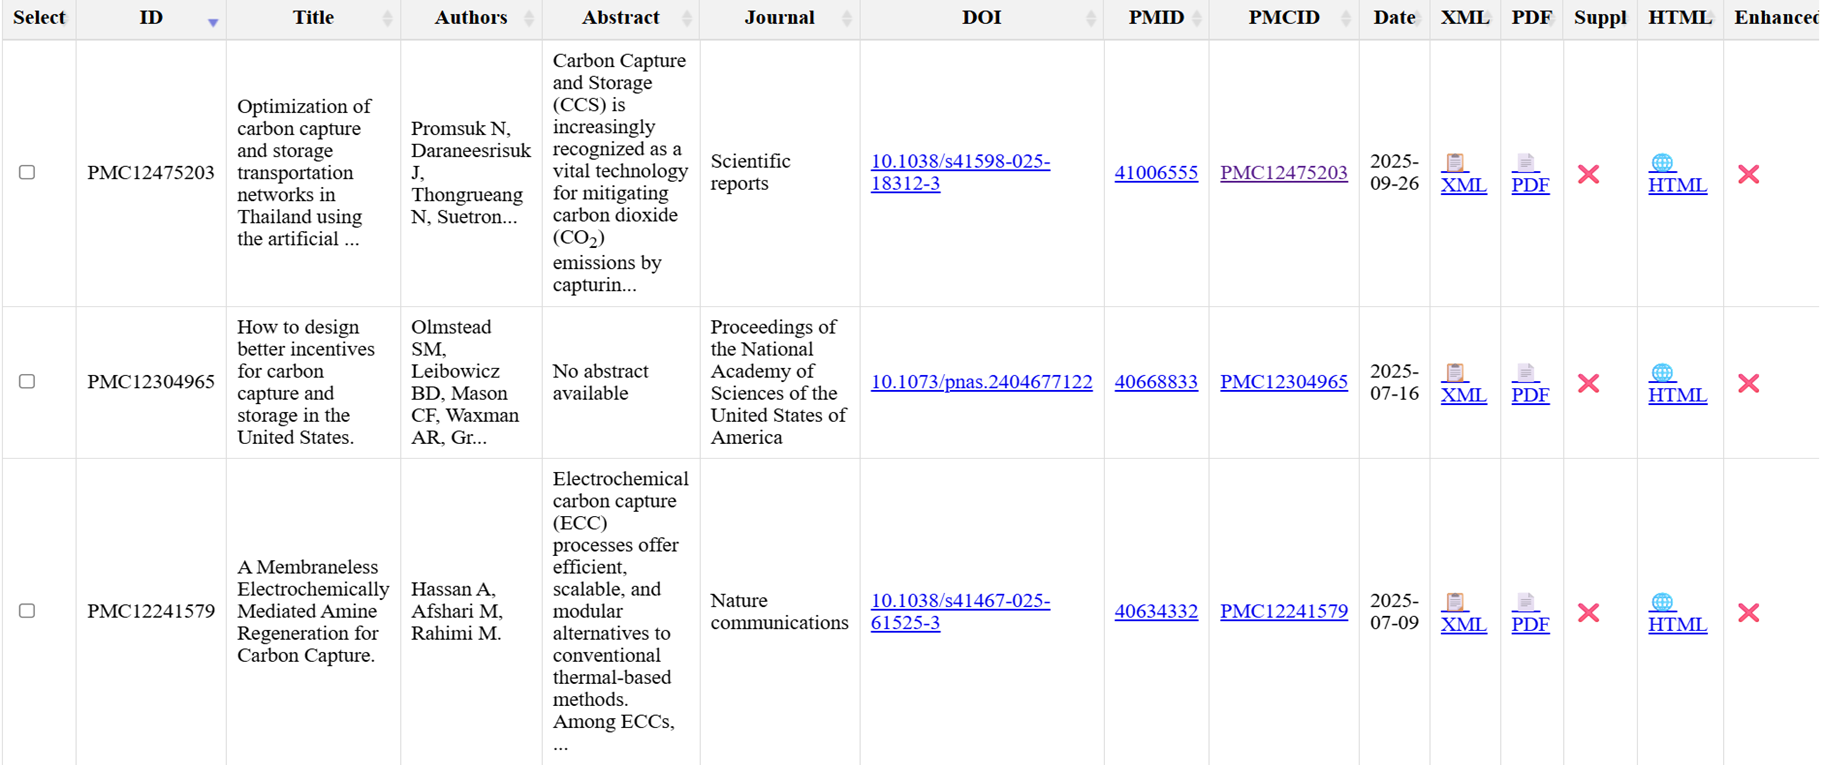

### **Downloading the results and saving them in local machine.**

In [ ]:
import shutil
from google.colab import files

# Step 1: Zip the entire folder
shutil.make_archive('/content/pygetpapers/Carbon_Capture', 'zip', '/content/pygetpapers/Carbon_Capture')

# Step 2: Download the zipped folder
files.download('/content/pygetpapers/Carbon_Capture')

## **Understand the Corpus**

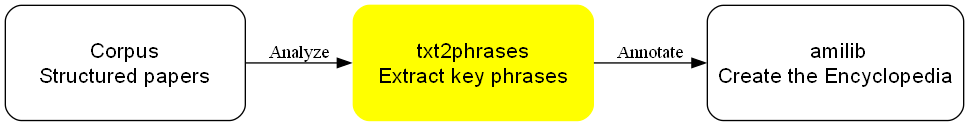

## **Step 2:Extract Keyphrases using txt2phrases**

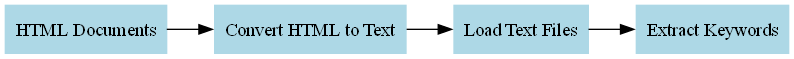

###  **Step 2.1. Install txt2phrases**

In [ ]:
!pip install --upgrade txt2phrases==0.2.0 --quiet


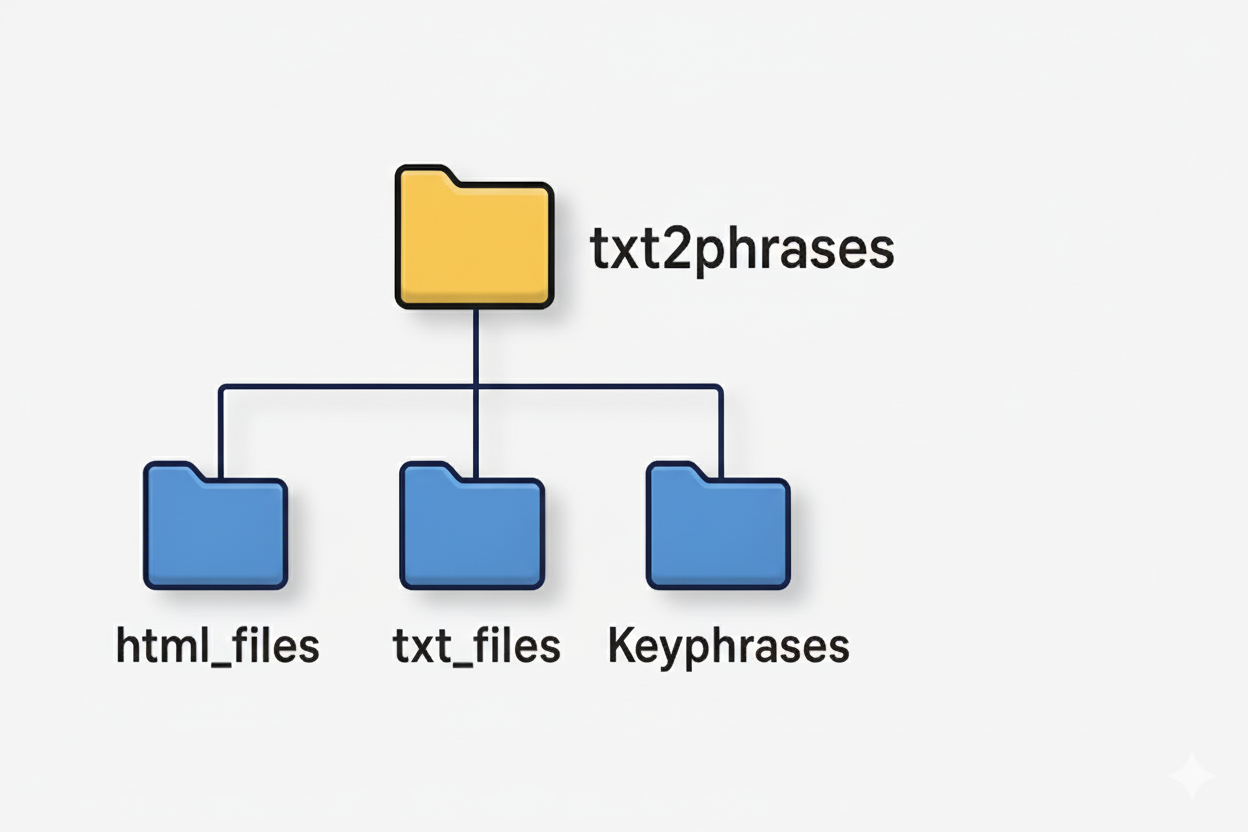

In [ ]:
import os
import shutil

# Change to the /content directory
%cd /content/

# Base directory
base_dir = "txt2phrases"

# Subfolders to create
subfolders = ["html_files", "txt_files", "keyphrases"]

# Create base directory if it doesn't exist
os.makedirs(base_dir, exist_ok=True)

# Create subfolders
for folder in subfolders:
    path = os.path.join(base_dir, folder)
    os.makedirs(path, exist_ok=True)
    print(f"Created folder: {path}")

### **Step 2.2:Convert html files into text files**
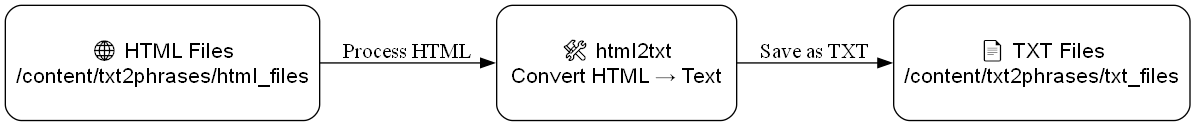

In [ ]:
!html2txt -i /content/txt2phrases/html_files -o /content/txt2phrases/txt_files > /dev/null 2>&1

### **Step 2.3:Extract Keyphrases from txt file**

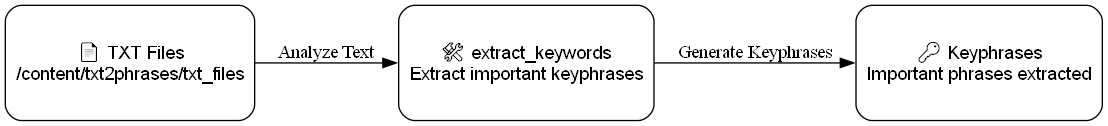

*   `-i /content/txt2phrases/txt_files`: Specifies the input directory containing the text files.
*   `-o /content/txt2phrases/Keyphrases`: Specifies the output directory where the extracted keyphrase will be saved as CSV files.
*   `-n 50`: This option tells the tool to extract the top 50 most relevant keywords from each text file.

In [ ]:
!extract_keywords -i /content/txt2phrases/txt_files -o /content/txt2phrases/keyphrases -n 50

## **Keyphrases are extracted**

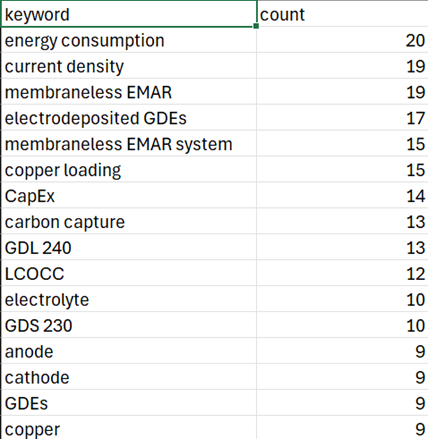

## **Step 3:Create an Encyclopedia using amilib**

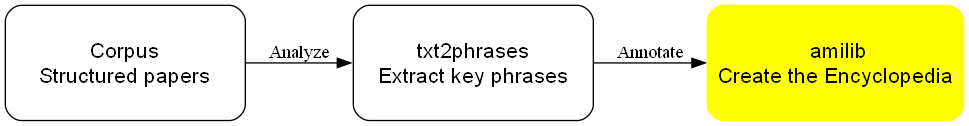

### **Step 3.1:Install amilib**

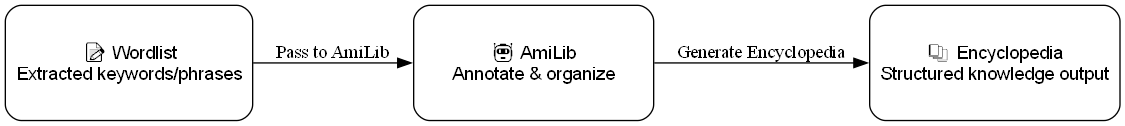

In [ ]:
!pip install amilib==1.0.0a9 > /dev/null 2>&1

### **Step 3.2:Create the encyclopedia**

In [ ]:
import pandas as pd

# Input and output file paths
input_file = "/content/txt2phrases/keyphrases/PMC12241579_keywords.csv"
output_file = "/content/txt2phrases/keyphrases/PMC12241579_keywords1.csv"

# Read the CSV file
df = pd.read_csv(input_file)

# Remove the 'count' column (if it exists)
if 'count' in df.columns:
    df = df.drop(columns=['count'])

# Extract only the 'keyword' column (assuming it’s named 'keyword')
if 'keyword' in df.columns:
    keywords = df['keyword']
else:
    keywords = df.iloc[:, 0]  # fallback if column has no header

# Save as plain text (no header or index)
keywords.to_csv(output_file, index=False, header=False)

print("✅ Successfully removed 'count' column and header, saved clean keywords to", output_file)


In [ ]:
!amilib DICT \
  --words '/content/txt2phrases/keyphrases/PMC12241579_keywords1.csv' \
  --description wikipedia \
  --dict output_dict_path.html \
  --figures\
  --operation create > /dev/null 2>&1


## **Encyclopedia Created**

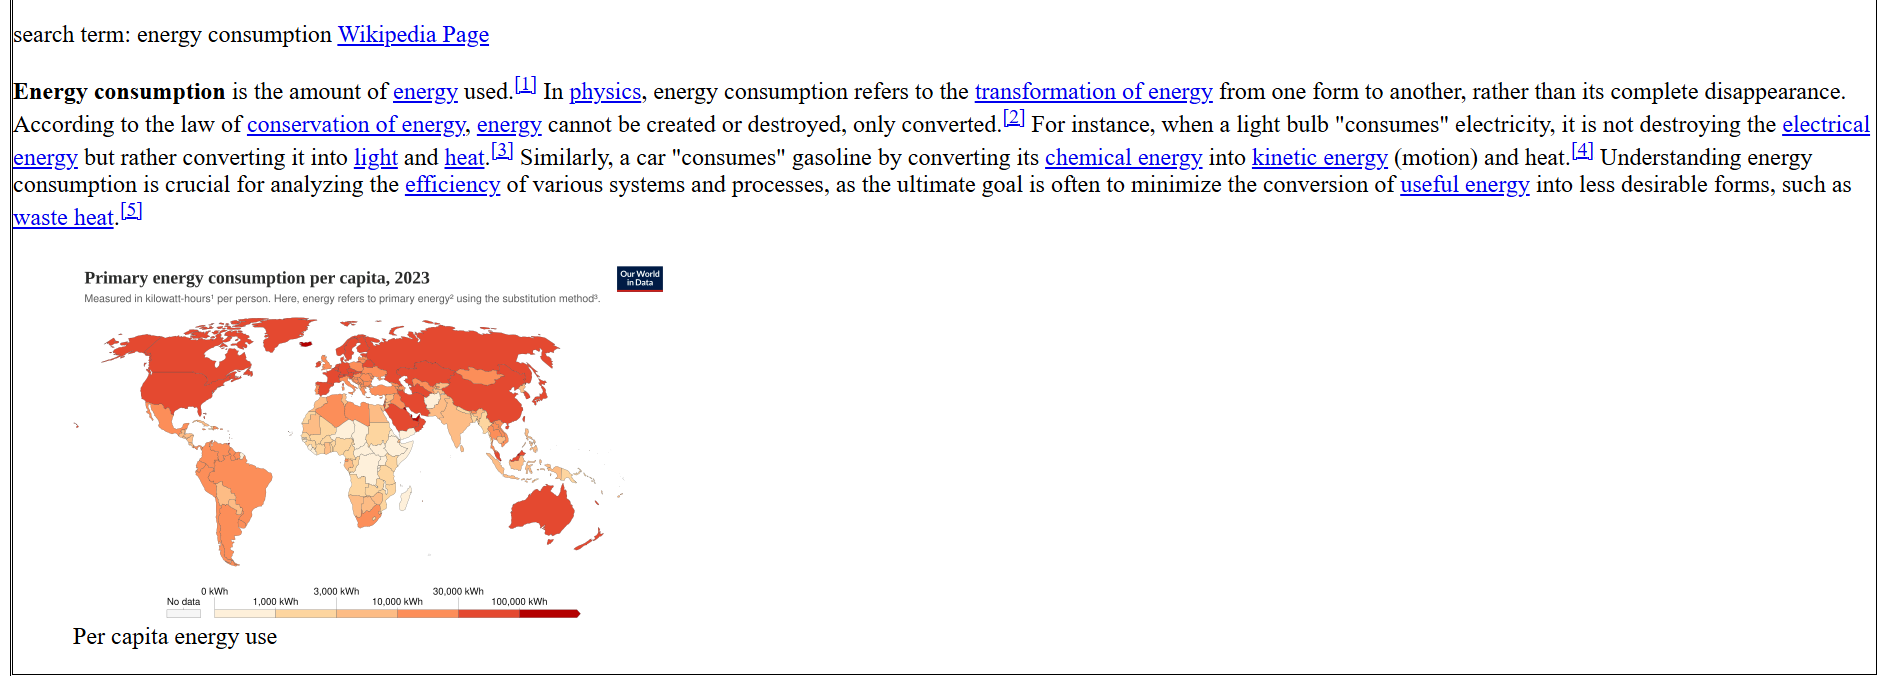

## **Created by: Udita Agarwal (semanticClimate)**

### License: **CC-BY**
